In [12]:
# Importaciones previas
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import pandas as pd
import getpass
import gspread
import json

#### 1. Considere las siguientes variables aleatorias.


> a) X ∼ b(x; n, p). Seleccione valores para n y p.

> b) Y ∼ exp(x; λ). Seleccione un valor para λ.

Para cada variable aleatoria genere una muestra aleatoria de tamaño 100 y realizar el siguiente procedimiento:

> a). Construir, según el caso, un histograma de masa o densidad y, en un mismo gráfico, compararlo con la función de probabilidad teórica.

> b). Calcular el promedio, los cuartiles y la desviación estándar. Comparar los valores obtenidos con los valores teóricos.

In [13]:
"""
  Funciones generales
"""
def calculate_percentil_theoric(data, percentil):
    """
      Parameters:
      - data: Array's data.
      - percentil: Value among 0 and 100 to calculate.

      Returns:
      - Calculated value.
    """
    # Ordena los datos
    sorted_data = sorted(data)

    # Calcula la posición drop el percentil
    position = (percentil / 100) * (len(sorted_data) - 1)

    # Verificar si la posición es un número entero
    if position.is_integer():
        # Si es un número entero, el percentil es el valor en esa posición
        percentile_value = sorted_data[int(position)]
    else:
        # Si no es un número entero, se interpola entre los valores cercanos
        lower_index = int(position)
        upper_index = lower_index + 1
        lower_value = sorted_data[lower_index]
        upper_value = sorted_data[upper_index]
        fractional_part = position - lower_index
        percentile_value = lower_value + fractional_part * (upper_value - lower_value)

    return percentile_value

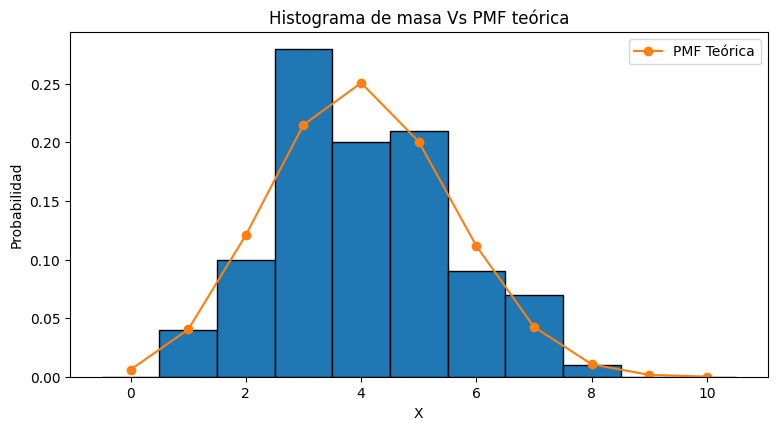


Resultados para X:
  Promedio obtenido: 4.04                          Promedio teórico: 4.0
  Cuartil 1 obtenido: 3.0                          Cuartil 1 teórico: 3.0
  Mediana obtenida: 4.0                            Mediana teórica: 4.0
  Cuartil 3 obtenido: 5.0                          Cuartil 3 obtenido: 5.0
  Desviación estándar obtenida: 1.5487             Desviación estándar teórica: 1.5492



In [14]:
"""
  1. Definimos los parámetros de las distribuciones.
      En el caso de la distribución binomial, los parámetros son :
        - n, el número de ensayos.
        - p, la probabilidad de éxito en cada ensayo.
        Valores:
          - n_value: 10
          - p_value: 0.4

"""
# Parámetros para la distribución binomial
n_value = 10
p_value = 0.4

# Tamaño de la muestra
sample_size = 100

# Ajustando tamaño de Plot
plt.figure(figsize=(15, 8))

"""
    Genere una muestra aleatoria de tamaño 100 y realizar el siguiente procedimiento:
        a) Construir un histograma de masa y compararlo con la función de probabilidad teórica.
        b) Calcular el promedio, los cuartiles y la desviación estándar. Comparar los valores obtenidos con los valores teóricos.
"""
# a) Generar muestra aleatoria para X ∼ b(x; n, p)
x_sample = np.random.binomial(n_value, p_value, size=sample_size)

# Histograma para X
plt.subplot(2, 2, 1)
plt.hist(x_sample, bins=np.arange(-0.5, n_value + 1.5, 1), edgecolor='black', density=True)
x_values = np.arange(0, n_value + 1)

# Obtenemos los valores de PMF (Función de Masa de Probabilidad) para mostrar la diferencia
pmf_values = stats.binom.pmf(x_values, n_value, p_value)
plt.plot(x_values, pmf_values, 'o-', label='PMF Teórica')

plt.xlabel('X')
plt.ylabel('Probabilidad')
plt.title('Histograma de masa Vs PMF teórica')
plt.legend()
# Mostrar gráficos
plt.tight_layout()
plt.show()

# b) Calcular promedio, cuartiles y desviación estándar para X
## Obtenidos
obtained_mean_x = round(np.mean(x_sample), 4)
obtained_q1_x, obtained_median_x, obtained_q3_x = np.percentile(x_sample, [25, 50, 75])
obtained_q1_x = round(obtained_q1_x, 4)
obtained_median_x = round(obtained_median_x, 4)
obtained_q3_x = round(obtained_q3_x, 4)
obtained_std_dev_x = round(np.std(x_sample), 4)
## Teóricos
theoric_mean_x = round(n_value * p_value, 4)
theoric_q1_x = round(calculate_percentil_theoric(x_sample, 25), 4)
theoric_median_x = round(calculate_percentil_theoric(x_sample, 50), 4)
theoric_q3_x = round(calculate_percentil_theoric(x_sample, 75), 4)
theoric_std_dev_x = round( math.sqrt(n_value * p_value * (1 - p_value)) , 4)

# Imprimir resultados para X
print()
print("Resultados para X:")
print(f"  Promedio obtenido: {obtained_mean_x}".ljust(50), f"Promedio teórico: {theoric_mean_x}")
print(f"  Cuartil 1 obtenido: {obtained_q1_x}".ljust(50), f"Cuartil 1 teórico: {theoric_q1_x}")
print(f"  Mediana obtenida: {obtained_median_x}".ljust(50), f"Mediana teórica: {theoric_median_x}")
print(f"  Cuartil 3 obtenido: {obtained_q3_x}".ljust(50), f"Cuartil 3 obtenido: {theoric_q3_x}")
print(f"  Desviación estándar obtenida: {obtained_std_dev_x}".ljust(50), f"Desviación estándar teórica: {theoric_std_dev_x}")
print()

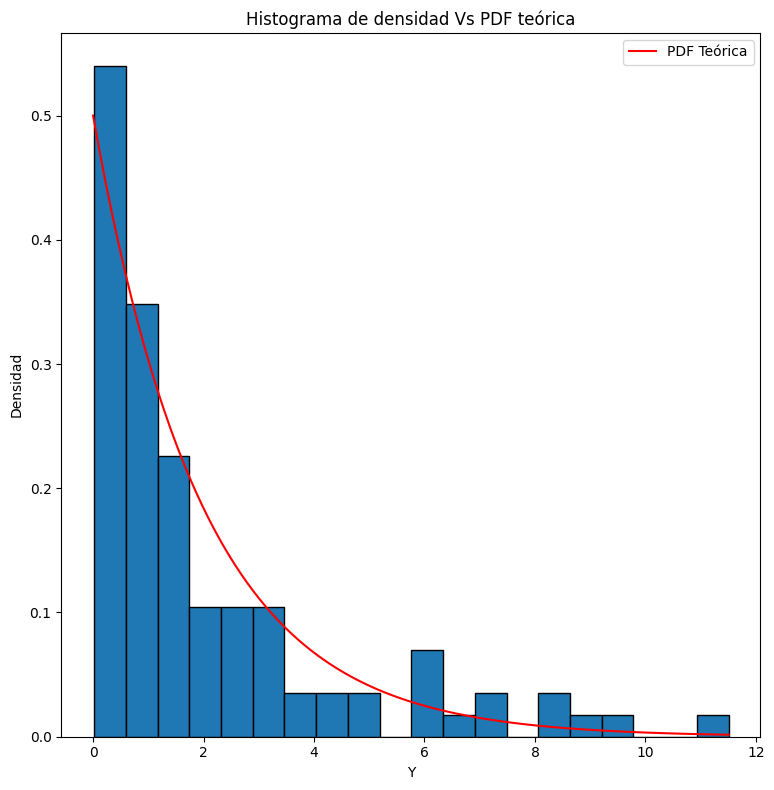


Resultados para X:
  Promedio obtenido: 2.1038                        Promedio teórico: 2.0
  Cuartil 1 obtenido: 0.4179                       Cuartil 1 teórico: 0.4179
  Mediana obtenida: 1.1501                         Mediana teórica: 1.1501
  Cuartil 3 obtenido: 2.7052                       Cuartil 3 obtenido: 2.7052
  Desviación estándar obtenida: 2.4069             Desviación estándar teórica: 2.0



In [15]:
"""
  1. Definimos los parámetros de las distribuciones.
      En el caso de la distribución exponencial, el parámetro es:
        - λ, la tasa de ocurrencia del evento aleatorio.
        Valor:
          - lambda_value: 1

"""
# Parámetro para la distribución exponencial
lambda_value = 0.5

# Tamaño de la muestra
sample_size = 100

# Ajustando tamaño de Plot
plt.figure(figsize=(15, 8))

"""
    Genere una muestra aleatoria de tamaño 100 y realizar el siguiente procedimiento:
        a) Construir un histograma de densidad y compararlo con la función de probabilidad teórica.
        b) Calcular el promedio, los cuartiles y la desviación estándar. Comparar los valores obtenidos con los valores teóricos.
"""
# a) Generar muestra aleatoria para Y ∼ exp(x; λ)
y_sample = np.random.exponential(scale=1/lambda_value, size=sample_size)

# Histograma para Y
plt.subplot(1, 2, 2)
plt.hist(y_sample, bins=20, edgecolor='black', density=True)
x_values = np.linspace(0, max(y_sample), 100)

# Obtenemos los valores de PDF (Función de Densidad de Probabilidad) para mostrar la diferencia
pdf_values = stats.expon.pdf(x_values, scale=1/lambda_value)
plt.plot(x_values, pdf_values, 'r-', label='PDF Teórica')

plt.xlabel('Y')
plt.ylabel('Densidad')
plt.title('Histograma de densidad Vs PDF teórica')
plt.legend()
# Mostrar gráficos
plt.tight_layout()
plt.show()

# b) Calcular promedio, cuartiles y desviación estándar para Y
## Obtenidos
obtained_mean_y = round(np.mean(y_sample), 4)
obtained_q1_y, obtained_median_y, obtained_q3_y = np.percentile(y_sample, [25, 50, 75])
obtained_q1_y = round(obtained_q1_y, 4)
obtained_median_y = round(obtained_median_y, 4)
obtained_q3_y = round(obtained_q3_y, 4)
obtained_std_dev_y = round(np.std(y_sample), 4)
## Teóricos
theoric_mean_y = round( 1 / lambda_value, 4)
theoric_q1_y = round(calculate_percentil_theoric(y_sample, 25), 4)
theoric_median_y = round(calculate_percentil_theoric(y_sample, 50), 4)
theoric_q3_y = round(calculate_percentil_theoric(y_sample, 75), 4)
theoric_std_dev_y = round( 1 / lambda_value , 4)

# Imprimir resultados para X
print()
print("Resultados para X:")
print(f"  Promedio obtenido: {obtained_mean_y}".ljust(50), f"Promedio teórico: {theoric_mean_y}")
print(f"  Cuartil 1 obtenido: {obtained_q1_y}".ljust(50), f"Cuartil 1 teórico: {theoric_q1_y}")
print(f"  Mediana obtenida: {obtained_median_y}".ljust(50), f"Mediana teórica: {theoric_median_y}")
print(f"  Cuartil 3 obtenido: {obtained_q3_y}".ljust(50), f"Cuartil 3 obtenido: {theoric_q3_y}")
print(f"  Desviación estándar obtenida: {obtained_std_dev_y}".ljust(50), f"Desviación estándar teórica: {theoric_std_dev_y}")
print()

#### 2. Suponga un sistema de procesamiento de imágenes utilizado en un proyecto de inteligencia artificial para el reconocimiento de objetos en videos de vigilancia.


Este sistema recibe continuamente flujos de imágenes de múltiples cámaras de seguridad. La tasa de llegada de imágenes por minuto sigue una distribución de Poisson con una tasa promedio de 15 imágenes por minuto. La precisión del reconocimiento de objetos depende en gran medida de la cantidad de imágenes procesadas por minuto.

> a). ¿Cuál es la probabilidad de que el sistema de procesamiento de imágenes reciba exactamente 10 imágenes en el próximo minuto?

> b). ¿Cuál es la probabilidad de que el sistema de procesamiento de imágenes no reciba ninguna imagen en el próximo minuto?

> c). ¿Cuál es la probabilidad de que el sistema de procesamiento de imágenes reciba al menos 30 imágenes en los próximos 5 minutos?

> d). Si el sistema tiene una ventana de tiempo de 30 minutos para procesar las imágenes, ¿cuál es la probabilidad de que reciba un total de 150 imágenes o más durante ese período?

In [16]:
lambda_value = 15  # Tasa promedio de llegada de imágenes por minuto
k = 10 # Numero de imagenes

# Cálculo de la probabilidad usando la fórmula de Poisson
probability = (math.exp(-lambda_value) * (lambda_value ** k)) / math.factorial(k)

print(f"La probabilidad de recibir exactamente 10 imágenes en el próximo minuto es: {probability:.6f}")


La probabilidad de recibir exactamente 10 imágenes en el próximo minuto es: 0.048611


In [17]:
lambda_value = 15  # Tasa promedio de llegada de imágenes por minuto
k = 0  # Ninguna imagen

# Cálculo de la probabilidad usando la fórmula de Poisson
probability = (math.exp(-lambda_value) * (lambda_value ** k)) / math.factorial(k)

print(f"La probabilidad de no recibir ninguna imagen en el próximo minuto es: {probability:.8f}")


La probabilidad de no recibir ninguna imagen en el próximo minuto es: 0.00000031


In [18]:
lambda_value = 15  # Tasa promedio de llegada de imágenes por minuto
k = 30  # Mínimo de imágenes deseadas
intervalo_tiempo = 5  # Minutos

# Cálculo de la probabilidad acumulativa utilizando la distribución Poisson acumulativa
probability = 1 - stats.poisson.cdf(k - 1, lambda_value * intervalo_tiempo)

print(f"La probabilidad de recibir al menos 30 imágenes en los próximos 5 minutos es: {probability:.6f}")


La probabilidad de recibir al menos 30 imágenes en los próximos 5 minutos es: 1.000000


In [19]:
lambda_value = 15  # Tasa promedio de llegada de imágenes por minuto
intervalo_tiempo = 30  # Minutos
k = 150  # Mínimo de imágenes deseadas en 30 minutos

# Cálculo de la probabilidad acumulativa utilizando la distribución Poisson acumulativa
probability = 1 - stats.poisson.cdf(k - 1, lambda_value * intervalo_tiempo)

print(f"La probabilidad de recibir un total de 150 imágenes o más en 30 minutos es: {probability:.6f}")


La probabilidad de recibir un total de 150 imágenes o más en 30 minutos es: 1.000000


#### 3. La duración de la gestacion humana se aproxima bien mediante una distribucion normal con una media µ = 280 dıas y una desviacion estandar σ = 8,5 dias



> a) Realice graficas correspondiente a la funcion de densidad de probabilidad
(pdf) y a la funcion de distribuci´on acumulativa (cdf).

> b) Supongamos que tienes un examen final que esta programado para el 14
de noviembre y tu profesora embarazada tiene una fecha de parto prevista
para el 19 de noviembre. Encuentre la probabilidad de que d´e a luz el
mismo d´ıa del examen final o antes.

> c) Encuentre la probabilidad de que de a luz en noviembre despues del examen.

> d) La profesora decide adelantar la fecha del examen para que haya un 95 %
de probabilidad de que d´e a luz despu´es del examen. ¿Qu´e fecha deber´ıa
elegir?

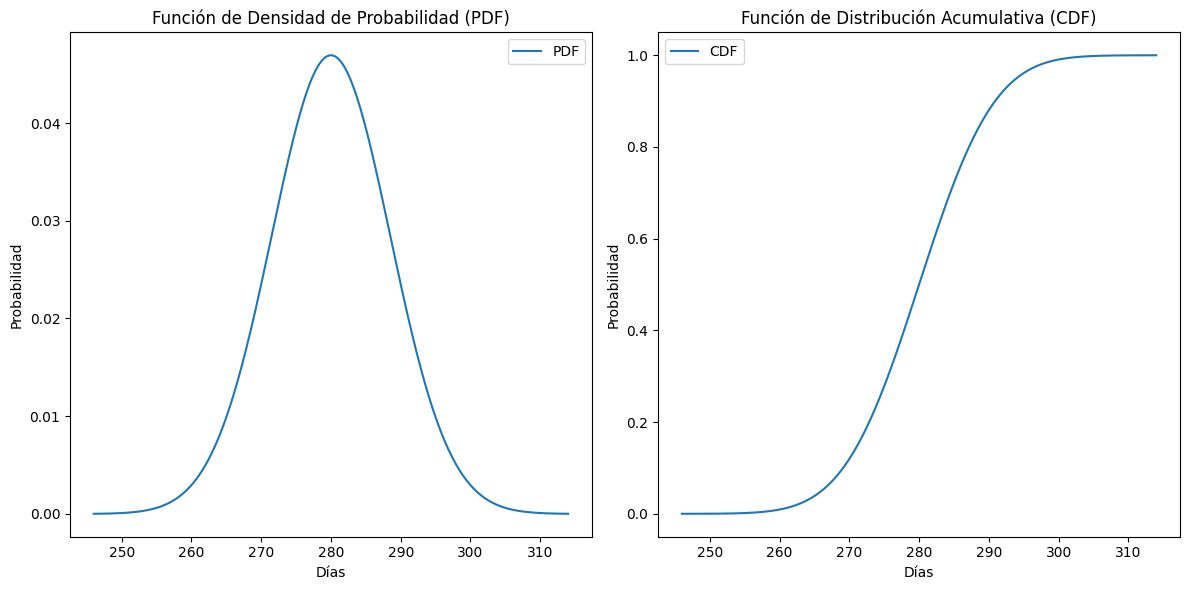

In [20]:
mu = 280  # Media µ
sigma = 8.5  # Desviación estándar σ

# Crear un rango de días para el gráfico
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Función de densidad de probabilidad (pdf)
pdf = norm.pdf(x, mu, sigma)

# Función de distribución acumulativa (cdf)
cdf = norm.cdf(x, mu, sigma)

# Gráficos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, pdf, label='PDF')
plt.title('Función de Densidad de Probabilidad (PDF)')
plt.xlabel('Días')
plt.ylabel('Probabilidad')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF')
plt.title('Función de Distribución Acumulativa (CDF)')
plt.xlabel('Días')
plt.ylabel('Probabilidad')
plt.legend()

plt.tight_layout()
plt.show()

b) Para encontrar la probabilidad de que la profesora dé a luz el mismo día del examen final o antes, se podria usar la función de distribución acumulativa (CDF). La probabilidad de que dé a luz antes del 14 (275 dias) de noviembre es:

P(X ≤ 275)

Donde ***X*** es la duración de la gestación en días. Calcular esto usando la función de distribución acumulativa (CDF) de la distribución normal:

In [21]:
"""
  b). ¿Cuál es la probabilidad de que el sistema de procesamiento de imágenes no reciba ninguna imagen en el próximo minuto?
"""
fecha_exam = 275  # Día del examen final

# Probabilidad de dar a luz el mismo día del examen final o antes
prob_before_exam = norm.cdf(fecha_exam, mu, sigma)

print(f"La probabilidad de dar a luz el mismo día del examen final o antes es: {prob_before_exam:.15f}")

La probabilidad de dar a luz el mismo día del examen final o antes es: 0.278187185213453


c) Para encontrar la probabilidad de que dé a luz en noviembre después del examen, calcular la probabilidad complementaria a la del punto b:

P(X>275)

In [22]:
"""
  c). ¿Cuál es la probabilidad de que el sistema de procesamiento de imágenes reciba al menos 30 imágenes en los próximos 5 minutos?
"""
# Probabilidad de dar a luz en noviembre después del examen
prob_after_exam = 1 - prob_before_exam #con esto podemos obtener la probabilidad del evento contrario

print(f"La probabilidad de dar a luz en noviembre después del examen es: {prob_after_exam:.15f}")

La probabilidad de dar a luz en noviembre después del examen es: 0.721812814786547


d) Para encontrar la fecha en la que la profesora debería adelantar el examen para que haya un 95% de probabilidad de dar a luz después del examen, puedes utilizar la función inversa de la distribución acumulativa (CDF). En otras palabras, necesitas encontrar el valor de X (día) tal que:

P(**X**> **X** *elegido*) = 0.95

In [23]:
"""
  d). Si el sistema tiene una ventana de tiempo de 30 minutos para procesar las imágenes, ¿cuál es la probabilidad de que reciba un total de 150 imágenes o más durante ese período?
"""
# Cuantil para obtener el día en el que se debe adelantar el examen
quantile_value = norm.ppf(0.95, mu, sigma)

print(f"La fecha en la que la profesora debería adelantar el examen para tener un 95% de probabilidad de dar a luz después del examen es aproximadamente el día {quantile_value.round()}")


La fecha en la que la profesora debería adelantar el examen para tener un 95% de probabilidad de dar a luz después del examen es aproximadamente el día 294.0


#### 4. El archivo Web Server Requests G contiene un conjunto de datos que proporciona un registro histórico (sintético) de la tasa de llegada de solicitudes que un servidor web ha experimentado durante un intervalo de tiempo de 5 minutos. Esta información es esencial para comprender y gestionar la carga del servidor, planificar la infraestructura y garantizar un rendimiento óptimo en un entorno de servidor web real.

  > a) Identificar patrones de tráfico web como horas pico de actividad y momentos de menor demanda.

  > b) Ajuste una distribución gamma a sus datos de "Arrival Rate", trace el histograma de sus datos junto con la función de densidad de probabilidad (pdf) de la distribución gamma ajustada y muestre los parámetros de la distribución gamma ajustada.

  > c) ¿Cuál es la probabilidad de que el servidor reciba más de 8 solicitudes durante el próximo intervalo?

  > d) ¿Cuál es la probabilidad de que la tasa de llegada supere un umbral crítico de, por ejemplo, 15 solicitudes por minuto, en el próximo intervalo?
  
  > e) Si la capacidad máxima de procesamiento del servidor es de 25 solicitudes por intervalo, ¿Cuál es la probabilidad de superar la capacidad máxima de procesamiento del servidor en el siguiente intervalo

En la celda que tenemos a continuacion creamos la conexion a la API de google drive para extraer el archivo desde ahi, y omitir asi el tener nuestro  archivo en nuestro entorno de ejecucion

In [24]:

# Aquí estamos usando ingresando las credenciales con las que tendremos acceso al archivo de Google Sheets que se encuentra compartido al correo analytics@davidventep.iam.gserviceaccount.com.
with open('credentials.json', 'r') as credentials:
    credentials_json = json.load(credentials)
# Realizamos el proceso de Login
gc = gspread.service_account_from_dict(credentials_json)
# Obtenemos los datos de la Hoja 1 del documento web_server_requests
sh_web_server_requests = gc.open("web_server_requests").sheet1

In [25]:
df = pd.DataFrame(sh_web_server_requests.get_all_records())
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['ArrivalRate'] = df['ArrivalRate'].round(2)

# Group by hour and aggregate
hourly_aggregated = df.groupby(pd.Grouper(key='Timestamp', freq='H')).mean().reset_index()
hourly_aggregated.head(3)

,Timestamp,ArrivalRate
0,2023-01-01 00:00:00,95.000000
1,2023-01-01 01:00:00,115.833333
2,2023-01-01 02:00:00,84.166667


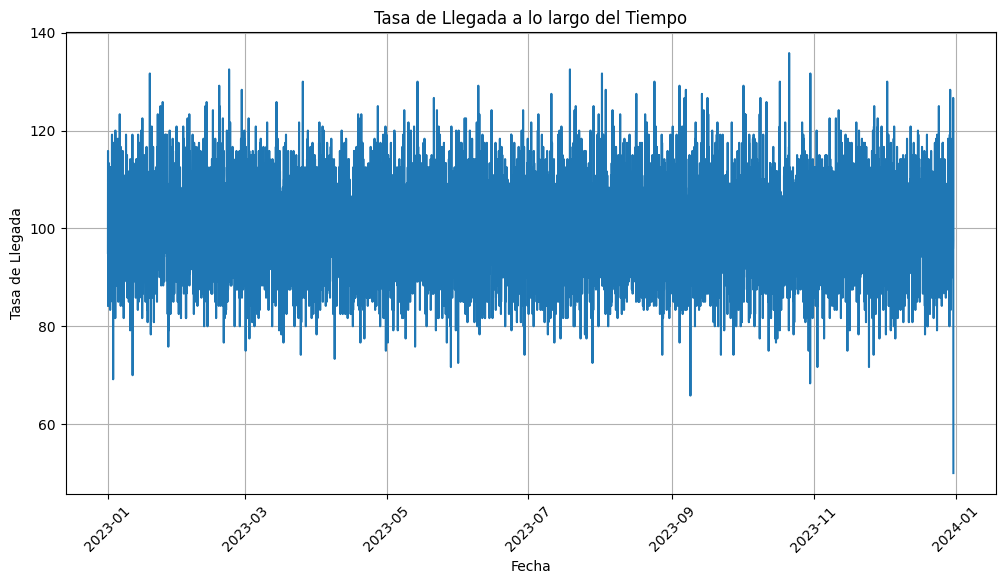

In [26]:
# Graficar la tasa de llegada a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(hourly_aggregated['Timestamp'], hourly_aggregated['ArrivalRate'])
plt.xlabel('Fecha')
plt.ylabel('Tasa de Llegada')
plt.title('Tasa de Llegada a lo largo del Tiempo')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [27]:
# Group by hours
# Agrupa por la hora en la columna 'Timestamp' y calcula el promedio en la columna 'Value'
hourly_avg = hourly_aggregated.groupby(hourly_aggregated['Timestamp'].dt.hour)['ArrivalRate'].mean().reset_index()

# Cambia el nombre de la columna resultante para mayor claridad
hourly_avg = hourly_avg.rename(columns={'Timestamp': 'Hours', 'ArrivalRate': 'Average Arrivals Rate'})
hourly_avg.head(2)

,Hours,Average Arrivals Rate
0,0,100.009132
1,1,99.963370


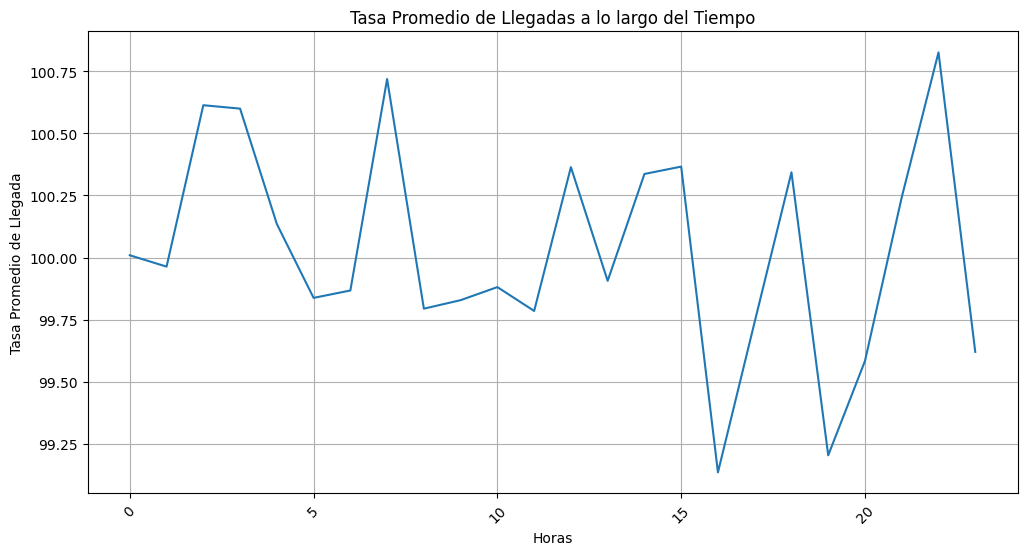

In [28]:
# Graficar la tasa de llegada a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg['Hours'], hourly_avg['Average Arrivals Rate'])
plt.xlabel('Horas')
plt.ylabel('Tasa Promedio de Llegada')
plt.title('Tasa Promedio de Llegadas a lo largo del Tiempo')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Parámetros de la Distribución Gamma Ajustada:
Shape (k): 34.790504883270216
Loc (θ): -86.0648798249141
Scale (β): 5.349140949094274


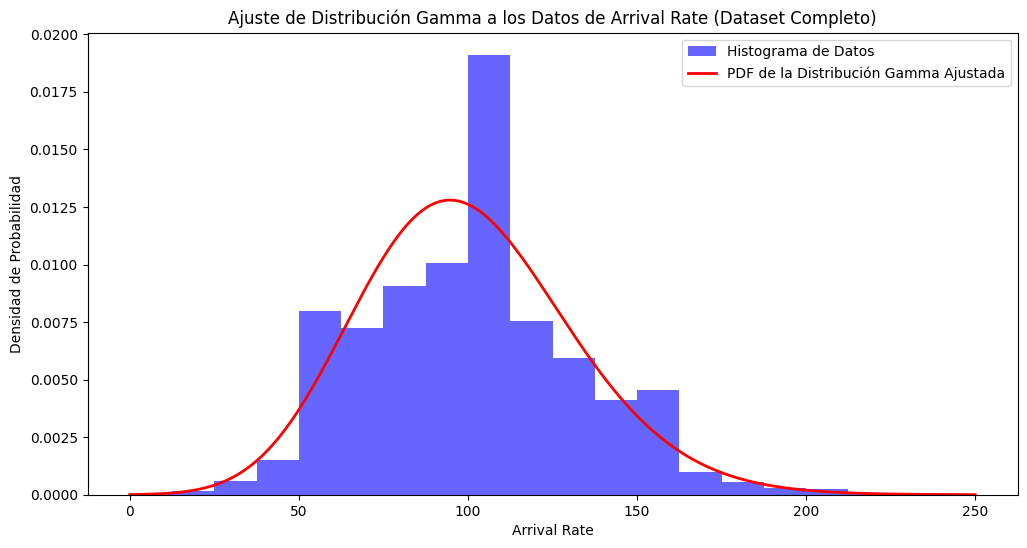

In [29]:
data = df
# Seleccionar la columna 'arrival_rate' y eliminar filas con valores no finitos
data = data.dropna(subset=['ArrivalRate'])

# Seleccionar la columna 'arrival_rate' para ajustar la distribución
arrival_rate_data = data['ArrivalRate']

# Ajustar una distribución gamma a los datos
shape, loc, scale = stats.gamma.fit(arrival_rate_data)

# Crear un histograma de los datos
plt.figure(figsize=(12, 6))
plt.hist(arrival_rate_data, bins=20, density=True, alpha=0.6, color='b', label='Histograma de Datos')

# Crear la función de densidad de probabilidad (pdf) de la distribución gamma ajustada
x = range(0, int(max(arrival_rate_data))+1)
pdf = stats.gamma.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='PDF de la Distribución Gamma Ajustada')

# Mostrar los parámetros de la distribución gamma ajustada
print(f'Parámetros de la Distribución Gamma Ajustada:')
print(f'Shape (k): {shape}')
print(f'Loc (θ): {loc}')
print(f'Scale (β): {scale}')

# Configurar el gráfico
plt.title('Ajuste de Distribución Gamma a los Datos de Arrival Rate (Dataset Completo)')
plt.xlabel('Arrival Rate')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Mostrar el gráfico
plt.show()

In [30]:
#C
# Supongamos que los datos siguen una distribución Poisson, estimamos lambda (tasa) a partir de los datos históricos
lambda_estimado = data['ArrivalRate'].mean()

# Calcular la probabilidad de recibir más de 8 solicitudes en el próximo intervalo
probabilidad = 1-stats.poisson.cdf(8, mu=lambda_estimado)

print(f'La probabilidad de recibir más de 8 solicitudes durante el próximo intervalo es: {probabilidad:.4f}')

La probabilidad de recibir más de 8 solicitudes durante el próximo intervalo es: 1.0000


In [31]:
from scipy.stats import poisson

# Supongamos que la columna 'ArrivalRate' contiene la tasa de llegada
arrival_rates = data['ArrivalRate']

# Calcular la tasa media de llegada (lambda)
lambda_value = arrival_rates.mean()

# Calcular la probabilidad de que X sea menor que 15
probability_less_than_15 = poisson.cdf(14, lambda_value)

# Calcular la probabilidad de que X sea igual o mayor que 15
probability_greater_than_or_equal_to_15 = 1 - probability_less_than_15

print("La probabilidad de que la tasa de llegada sea igual o mayor a 15 por minuto es:", probability_greater_than_or_equal_to_15)


La probabilidad de que la tasa de llegada sea igual o mayor a 15 por minuto es: 1.0


In [32]:
#E
capacidad_maxima = 25
probabilidad_supera_capacidad_maxima = 1 - stats.gamma.cdf(capacidad_maxima, shape, loc, scale)
print(f"La probabilidad de superar la capacidad máxima de {capacidad_maxima} solicitudes por intervalo es: {probabilidad_supera_capacidad_maxima:.8f}")

La probabilidad de superar la capacidad máxima de 25 solicitudes por intervalo es: 0.99697389
